In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# 学習用データの読み込み
df = np.loadtxt('../files/click.csv', delimiter=',', skiprows=1)

In [26]:
train_x = df[:, 0]
train_y = df[:, 1]

# 平均二乗誤差をプロットする

$ f\theta(x) = \theta_0 + \theta_1x + \theta_2x  $

- パラメタと特徴量をベクトルとして考えて積をとる

$
    X\theta = \begin{bmatrix} 
    1 & x^{(1)} & x^{(1)^2} \\ 
    1  & x^{(2)} & x^{(2)^2}  \\ 
    1 & x ^{(3)} & x^{(3)^2} \\ 
    \dots \\ 
    1 & x ^{(n)} & x^{(n)^2} \\ 
    \end{bmatrix}
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_0 + \theta_1x^{(1)} + \theta_2x^{(1)^2}\\
    \theta_0 + \theta_1x^{(2)} + \theta_2x^{(2)^2}\\
    \dots \\ 
    \theta_0 + \theta_1x^{(n)} + \theta_2x^{(n)^2}\\
    \end{bmatrix}
$

In [27]:
# パラメタの初期化
theta = np.random.rand(3)

In [28]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [29]:
# 学習データの行列を作る
def to_matrix(x):
    # np.onesは、値１の配列を作る(=特徴量0をつくっている)
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

In [30]:
# 訓練データの標準化
train_z = standardize(train_x) 

In [31]:
X = to_matrix(train_z)

In [32]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [33]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [34]:
# 平均誤二乗差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

### パラメタ更新式

$\displaystyle \theta_j := \theta_j - \eta \sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

- パラメタ更新式はベクトルの直積として考えることができる

In [35]:
# 学習率
ETA = 1e-3

In [36]:
# 誤差の差分
diff = 1

In [37]:
# 更新回数
count = 0

In [38]:
# 平均二乗誤差の履歴
errors = []

In [39]:
# 学習
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # パラメタを更新
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

In [40]:
# 誤差をプロット
x = np.arange(len(errors))

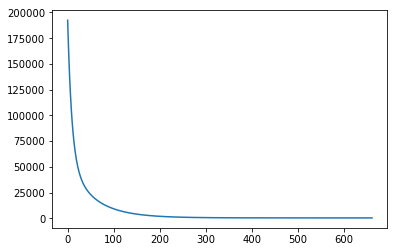

In [41]:
plt.plot(x, errors)
plt.show()